<a href="https://colab.research.google.com/github/Levelearn/data-analysis/blob/main/dpe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the uploaded dataset to inspect its structure
file_path = '/content/drive/MyDrive/Levelearn/dataset_dpe.csv'
df_dpe = pd.read_csv(file_path, encoding="latin-1", sep=";")

# Display the first few rows of the dataset to understand the structure
df_dpe.head()

,ï»¿Timestamp,Email Address,Angkatan,Apakah anda sudah pernah mengambil mata kuliah Interaksi Manusia Komputer (IMK)?,Level,Badge,Challenge,Points,Locked Content,Experience (XP),Feedback,Progress Bar,LeaderBoard,Time Pressure
0,12/5/2024 8:43:57,salwaharahap2018@gmail.com,2021,Sudah Mengambil,2,2,2,2,2,1,2,2,2,2
1,12/5/2024 8:44:09,dwipurba77@gmail.com,2021,Sudah Mengambil,2,2,2,2,2,2,2,2,2,2
2,12/5/2024 8:46:06,naomi.sihombing0803@gmail.com,2021,Sudah Mengambil,2,2,2,2,2,2,2,2,2,2
3,12/5/2024 8:57:25,gabrielhutagalung970@gmail.com,2021,Sudah Mengambil,2,2,1,2,1,1,1,2,2,1
4,12/5/2024 8:55:09,intansianipar581@gmail.com,2021,Sudah Mengambil,2,2,1,2,1,1,1,2,2,1


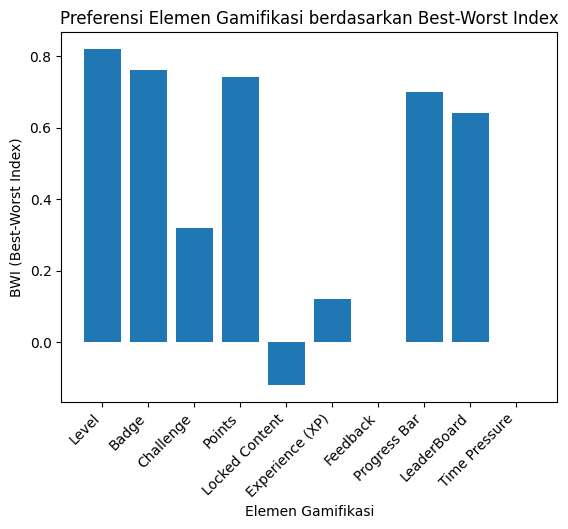

,Element,Best_Count,Worst_Count,BWI
0,Level,91,9,0.82
1,Badge,88,12,0.76
2,Challenge,66,34,0.32
3,Points,87,13,0.74
4,Locked Content,44,56,-0.12
5,Experience (XP),56,44,0.12
6,Feedback,50,50,0.00
7,Progress Bar,85,15,0.70
8,LeaderBoard,82,18,0.64
9,Time Pressure,50,50,0.00


In [ ]:
# Extracting the relevant columns (elemen gamifikasi)
gamification_columns = ['Level', 'Badge', 'Challenge', 'Points', 'Locked Content',
                        'Experience (XP)', 'Feedback', 'Progress Bar', 'LeaderBoard', 'Time Pressure']

# Initialize an empty dictionary to store Best and Worst counts
best_worst_counts = {'Element': [], 'Best_Count': [], 'Worst_Count': [], 'BWI': []}

# Loop through each gamification element to calculate Best, Worst, and BWI
for column in gamification_columns:
    best_count = (df_dpe[column] == 2).sum()  # Count of Best (2)
    worst_count = (df_dpe[column] == 1).sum()  # Count of Worst (1)

    # Calculate Best-Worst Index (BWI)
    bwi = (best_count - worst_count) / (best_count + worst_count) if (best_count + worst_count) != 0 else 0

    # Append the result to the dictionary
    best_worst_counts['Element'].append(column)
    best_worst_counts['Best_Count'].append(best_count)
    best_worst_counts['Worst_Count'].append(worst_count)
    best_worst_counts['BWI'].append(bwi)

# Convert the dictionary to a DataFrame for better readability
df_bwi = pd.DataFrame(best_worst_counts)

# Visualize the Best-Worst Index (BWI) for each element
plt.bar(df_bwi['Element'], df_bwi['BWI'])
plt.xlabel('Elemen Gamifikasi')
plt.ylabel('BWI (Best-Worst Index)')
plt.title('Preferensi Elemen Gamifikasi berdasarkan Best-Worst Index')
plt.xticks(rotation=45, ha='right')
plt.show()

# Display the resulting DataFrame
df_bwi


Tidak, kode yang saya berikan sebelumnya hanya mencakup penghitungan Best-Worst Index (BWI) dan visualisasi menggunakan grafik batang. Jika Anda ingin melakukan Multidimensional Scaling (MDS) atau Principal Component Analysis (PCA) untuk analisis lebih lanjut, Anda perlu menambahkan tahap tambahan setelah penghitungan BWI.

1. Multidimensional Scaling (MDS):
MDS digunakan untuk memvisualisasikan data dalam ruang berdimensi rendah (misalnya 2D atau 3D) berdasarkan distances atau kesamaan antara elemen-elemen gamifikasi berdasarkan preferensi responden.

2. Principal Component Analysis (PCA):
PCA digunakan untuk mereduksi dimensi data dan menemukan komponen utama yang menjelaskan variabilitas data. Ini sangat berguna ketika Anda memiliki banyak elemen dan ingin melihat pola atau hubungan antara elemen-elemen tersebut.

Kode untuk MDS dan PCA:
a. Multidimensional Scaling (MDS):
Untuk menggunakan MDS, pertama-tama kita perlu menghitung matriks jarak antara elemen-elemen gamifikasi. Kita akan menggunakan skor BWI yang sudah dihitung sebagai dasar untuk menghitung jarak antar elemen.

b. Principal Component Analysis (PCA):
Untuk PCA, kita bisa mengaplikasikan PCA langsung pada data elemen gamifikasi (menggunakan skala 1 dan 2 untuk Best dan Worst) untuk mereduksi dimensi dan menganalisis pola.

Berikut adalah kode untuk kedua metode tersebut.

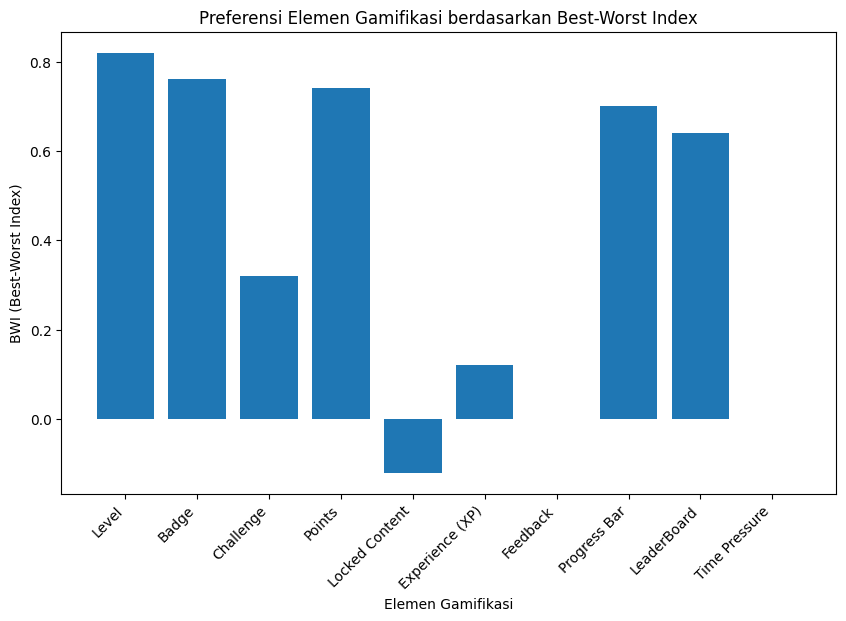

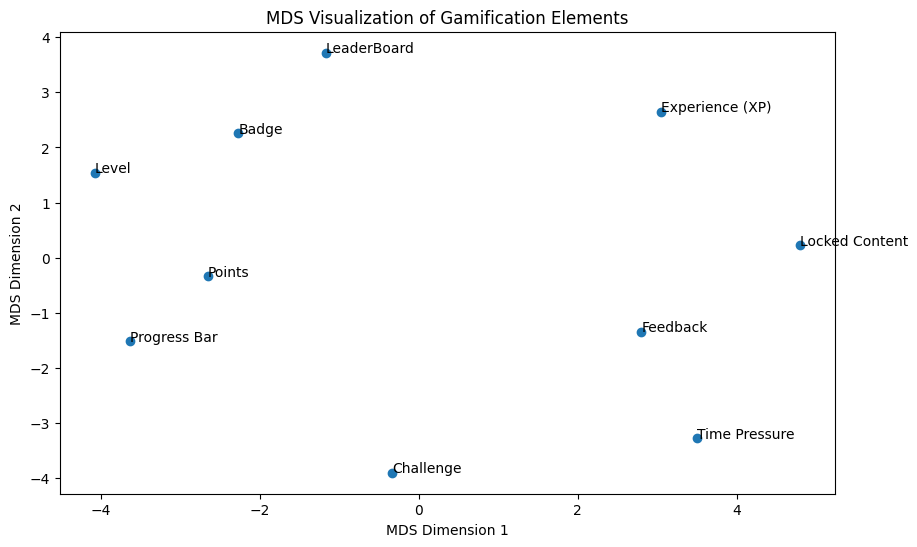

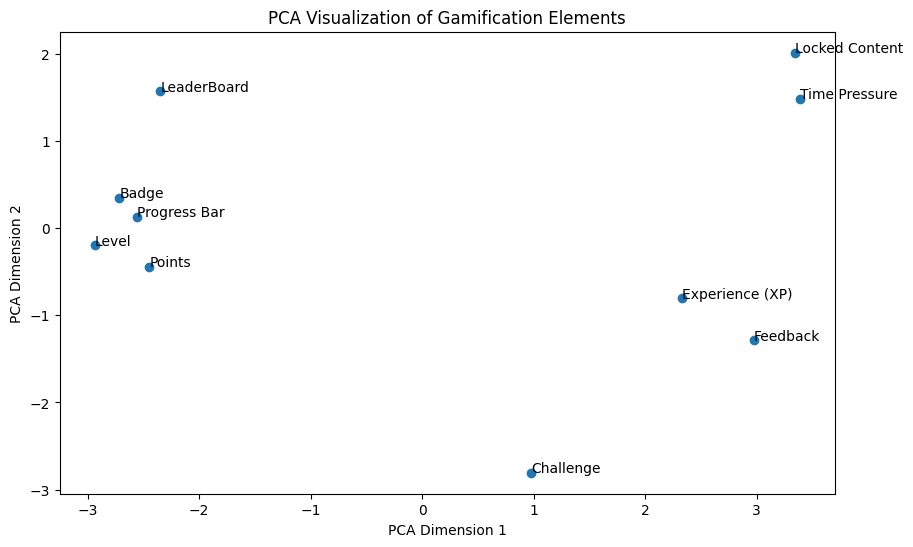

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances

# Load the dataset (assuming df_dpe is already loaded)
# Extracting the relevant columns (elemen gamifikasi)
gamification_columns = ['Level', 'Badge', 'Challenge', 'Points', 'Locked Content',
                        'Experience (XP)', 'Feedback', 'Progress Bar', 'LeaderBoard', 'Time Pressure']

# Initialize an empty dictionary to store Best and Worst counts
best_worst_counts = {'Element': [], 'Best_Count': [], 'Worst_Count': [], 'BWI': []}

# Loop through each gamification element to calculate Best, Worst, and BWI
for column in gamification_columns:
    best_count = (df_dpe[column] == 2).sum()  # Count of Best (2)
    worst_count = (df_dpe[column] == 1).sum()  # Count of Worst (1)

    # Calculate Best-Worst Index (BWI)
    bwi = (best_count - worst_count) / (best_count + worst_count) if (best_count + worst_count) != 0 else 0

    # Append the result to the dictionary
    best_worst_counts['Element'].append(column)
    best_worst_counts['Best_Count'].append(best_count)
    best_worst_counts['Worst_Count'].append(worst_count)
    best_worst_counts['BWI'].append(bwi)

# Convert the dictionary to a DataFrame for better readability
df_bwi = pd.DataFrame(best_worst_counts)

# Visualize the Best-Worst Index (BWI) for each element
plt.figure(figsize=(10, 6))
plt.bar(df_bwi['Element'], df_bwi['BWI'])
plt.xlabel('Elemen Gamifikasi')
plt.ylabel('BWI (Best-Worst Index)')
plt.title('Preferensi Elemen Gamifikasi berdasarkan Best-Worst Index')
plt.xticks(rotation=45, ha='right')
plt.show()

# For MDS, we need a distance matrix
# Convert the Best-Worst values (1, 2) into a distance matrix
data_matrix = df_dpe[gamification_columns].apply(lambda x: [1 if val == 1 else 0 for val in x], axis=0).T
distance_matrix = pairwise_distances(data_matrix, metric='euclidean')

# Perform MDS
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
mds_results = mds.fit_transform(distance_matrix)

# Visualize the MDS result
plt.figure(figsize=(10, 6))
plt.scatter(mds_results[:, 0], mds_results[:, 1], label='Elemen Gamifikasi')
for i, txt in enumerate(df_bwi['Element']):
    plt.annotate(txt, (mds_results[i, 0], mds_results[i, 1]))
plt.title('MDS Visualization of Gamification Elements')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.show()

# For PCA, apply PCA to the Best-Worst matrix
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_matrix)

# Visualize the PCA result
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], label='Elemen Gamifikasi')
for i, txt in enumerate(df_bwi['Element']):
    plt.annotate(txt, (pca_result[i, 0], pca_result[i, 1]))
plt.title('PCA Visualization of Gamification Elements')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.show()


Penjelasan Kode:
MDS (Multidimensional Scaling):

Kita pertama-tama mengubah nilai Best-Worst menjadi matriks jarak (distance matrix) menggunakan metrik Euclidean.

Kemudian, kita melakukan MDS untuk mereduksi dimensi menjadi 2 dan memvisualisasikan hasilnya dalam 2D.

PCA (Principal Component Analysis):

Kita juga menerapkan PCA pada data Best-Worst dan mereduksinya menjadi 2 dimensi untuk analisis visual.

Dengan PCA, kita dapat melihat hubungan antara elemen-elemen gamifikasi berdasarkan preferensi responden.

Hasil Visualisasi:
MDS Plot akan menunjukkan elemen-elemen gamifikasi yang lebih sering dipilih bersama atau memiliki preferensi serupa.

PCA Plot akan memberikan gambaran yang lebih jelas tentang komponen utama yang menjelaskan variabilitas dalam data preferensi elemen gamifikasi.

Dengan kedua analisis ini, Anda dapat melihat hubungan antar elemen-elemen gamifikasi berdasarkan preferensi pengguna dalam format visual yang lebih mudah dipahami.